<a href="https://colab.research.google.com/github/Mohammad-Shiblu/Pytorch_Tutorial/blob/main/02_pytorch_classifiaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2. Neural Network classifiaction with pytorch

Classifiaction is a problem of predicting whether something is one thing or another (there might be multiple things as the options)


In [ ]:
## 1. Make classification data and get it ready

import sklearn

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

len(X), len(y)

(1000, 1000)

In [ ]:
print((f"first 5 samples of X\n: {X[:5]}"))
print((f"first 5 samples of y\n: {y[:5]}"))

first 5 samples of X
: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 samples of y
: [1 1 1 1 0]


In [ ]:
# Make Dataframe of Circle data
import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


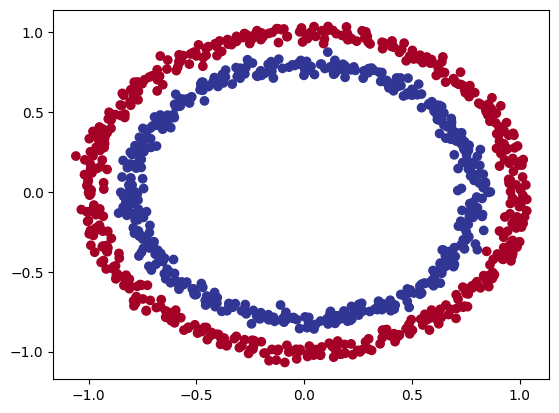

In [ ]:
# Visualize
import matplotlib.pyplot as plt

plt.scatter(x = X[:, 0],
            y = X[:, 1],
            c = y,
            cmap = plt.cm.RdYlBu);

Note: The data we're working with is often referred to as a toy dataset, a dataset that is small enouh to experiment but still sizeable enough to practice the fundamentals.

### Check input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

## Turn data into tensors and create train and test splits


In [ ]:
import torch
torch.__version__

'2.0.1+cu118'

In [ ]:
type(X)

numpy.ndarray

In [ ]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
X.dtype

torch.float32

In [ ]:
# split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

from scipy.optimize._lsq.bvls import OptimizeResult
from sqlalchemy.sql.functions import mode
from pandas.core.indexes.accessors import CombinedDatetimelikeProperties
## 2. Building a model

Lets build a model to classify our blue and red dot
To do so, we want to:
1. Setup device agnostic code so our code will run on an accelarator (GPU) if there is one.
2. Construct a model (by subclasing `nn.module`).
3. Define a lsos function and Optimizer.
4. Create a training and testing loop.

In [ ]:
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# 1. COnstruct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable pf handling the shape our data
    self.layer_1 = nn.Linear(in_features =2, out_features = 5) # takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features =1) # takes in 5 features from previous layer and output a single feature (same shape as y)

  # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x))

  # 4. Instantialte an instance of our model class and send it to our target device

model_0 = CircleModelV0().to(device)

model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
# Lets replicate the model above using nn.sequential()
model_1 = nn.Sequential(
    nn.Linear(in_features= 2, out_features=5),
    nn.Linear(in_features =5, out_features =1)
).to(device)
model_1

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# Make some prediction
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.4082, -0.3117],
                      [ 0.4057,  0.5210],
                      [ 0.0241,  0.0161],
                      [-0.4278, -0.5275],
                      [ 0.2139, -0.5469]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.6903,  0.3010, -0.4609, -0.1824,  0.4903], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.0134, -0.2653, -0.4268,  0.3799, -0.2802]], device='cuda:0')),
             ('layer_2.bias', tensor([0.4292], device='cuda:0'))])

In [ ]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Lenth of predictions: {len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f"Lenth of test samples: {len(X_test)}, shape: {X_test.shape}")
print(f"\nFirst 10 predictions: \n {untrained_preds[:10]}")
print(f"\nFirst 10 labels: \n {y_test[:10]}")

Lenth of predictions: 200, shape: torch.Size([200, 1])
Lenth of test samples: 200, shape: torch.Size([200, 2])

First 10 predictions: 
 tensor([[ 0.3274],
        [ 0.1445],
        [ 0.6248],
        [ 0.2439],
        [ 0.3353],
        [ 0.2258],
        [-0.0600],
        [-0.0417],
        [ 0.6365],
        [ 0.1290]], device='cuda:0')

First 10 labels: 
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer
which loss function and optimizer you should use?

Again this is problem specific

For example for regression you might want MAE or MSE (Mean abosolute error or mean squared error)

For classification you might want binary cross entropy or categorical entropy (cross entropy)

And for optiizers, two of the most commons are SGD, ADAMs



In [ ]:
  # Setup the loss function
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.1)

In [ ]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) *100
  return acc


## Train Model

1. forward pass
2. calculate the loss
3. optimizer zero grad
4. loss backward
5. Optimizer step(gradient descent)

### 3.1 Going from raw logits -> Prediction probabilities -> Prediction labels

Our model outputs are going to be raw **logits**
we can convert these logits into prediction probabilities by passing them to some kind of activation function (e.g. sigmoid for binary class and softmax for multiclass classification)

Then we converts our models prediction probabilities to prediction labels by either rounding them or taking the argmax.

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# set the number of epoch
epochs = 100

# put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
# Build traiing and evaluation loop
for epoch in range(epochs):
  model_0.train()
  # forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  # calculate loss / accuracy
  loss = loss_fn(y_logits, y_train)

  acc = accuracy_fn(y_true= y_train,
                    y_pred=y_pred)
  # optimizer zero grad
  optimizer.zero_grad()

  # Loss bacward
  loss.backward()

  # optimizer step (gradient descent)
  optimizer.step()

  ## Testing
  model_0.eval()
  with torch.inference_mode():
    # forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # calculate the test loss
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred = test_pred)
    if epoch %10 ==0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f} | Test loss {test_loss:.5f}, test acc: {test_acc:.2f}")


Epoch: 0 | Loss: 0.71603, Acc: 58.00 | Test loss 0.70414, test acc: 61.00
Epoch: 10 | Loss: 0.70329, Acc: 52.88 | Test loss 0.69543, test acc: 51.00
Epoch: 20 | Loss: 0.69881, Acc: 51.25 | Test loss 0.69312, test acc: 51.50
Epoch: 30 | Loss: 0.69690, Acc: 51.00 | Test loss 0.69259, test acc: 51.00
Epoch: 40 | Loss: 0.69586, Acc: 50.25 | Test loss 0.69257, test acc: 51.00
Epoch: 50 | Loss: 0.69519, Acc: 50.25 | Test loss 0.69271, test acc: 51.50
Epoch: 60 | Loss: 0.69471, Acc: 50.25 | Test loss 0.69289, test acc: 49.50
Epoch: 70 | Loss: 0.69436, Acc: 50.00 | Test loss 0.69309, test acc: 49.00
Epoch: 80 | Loss: 0.69409, Acc: 50.25 | Test loss 0.69328, test acc: 49.00
Epoch: 90 | Loss: 0.69388, Acc: 50.25 | Test loss 0.69346, test acc: 48.50


In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


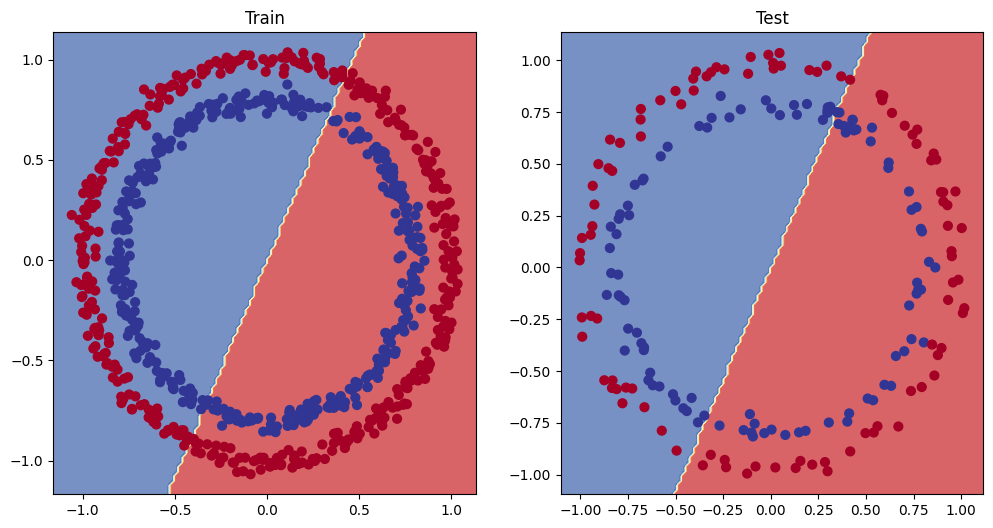

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

# 5. Improving our model(from a model perspective)
* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units go from 5 hidden to 10 hidden
* Fit for longer
* Changing the activation function
* Change the learning rate
* Change the loss function

These options are all from a models perspective because they deal directly with the model, rather than the data.

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_2 = CircleModelV1().to(device)
model_2

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
model_2.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [ ]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()
# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.1)
#

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_2.train()
  # 1. forward pass
  y_logits = model_2(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probabilities -> predictions

  # 2. Calculate the loss/acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  ### testing

  model_2.eval()
  with torch.inference_mode():
    # 1. forward pass
    test_logits = model_2(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Calculate the loss
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)

    # print out whats happening
    if epoch %100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f} | Test loss {test_loss:.5f}, test acc: {test_acc:.2f}")





Epoch: 0 | Loss: 0.69396, Acc: 50.88 | Test loss 0.69261, test acc: 51.00
Epoch: 100 | Loss: 0.69396, Acc: 50.88 | Test loss 0.69261, test acc: 51.00
Epoch: 200 | Loss: 0.69396, Acc: 50.88 | Test loss 0.69261, test acc: 51.00
Epoch: 300 | Loss: 0.69396, Acc: 50.88 | Test loss 0.69261, test acc: 51.00
Epoch: 400 | Loss: 0.69396, Acc: 50.88 | Test loss 0.69261, test acc: 51.00
Epoch: 500 | Loss: 0.69396, Acc: 50.88 | Test loss 0.69261, test acc: 51.00
Epoch: 600 | Loss: 0.69396, Acc: 50.88 | Test loss 0.69261, test acc: 51.00
Epoch: 700 | Loss: 0.69396, Acc: 50.88 | Test loss 0.69261, test acc: 51.00
Epoch: 800 | Loss: 0.69396, Acc: 50.88 | Test loss 0.69261, test acc: 51.00
Epoch: 900 | Loss: 0.69396, Acc: 50.88 | Test loss 0.69261, test acc: 51.00


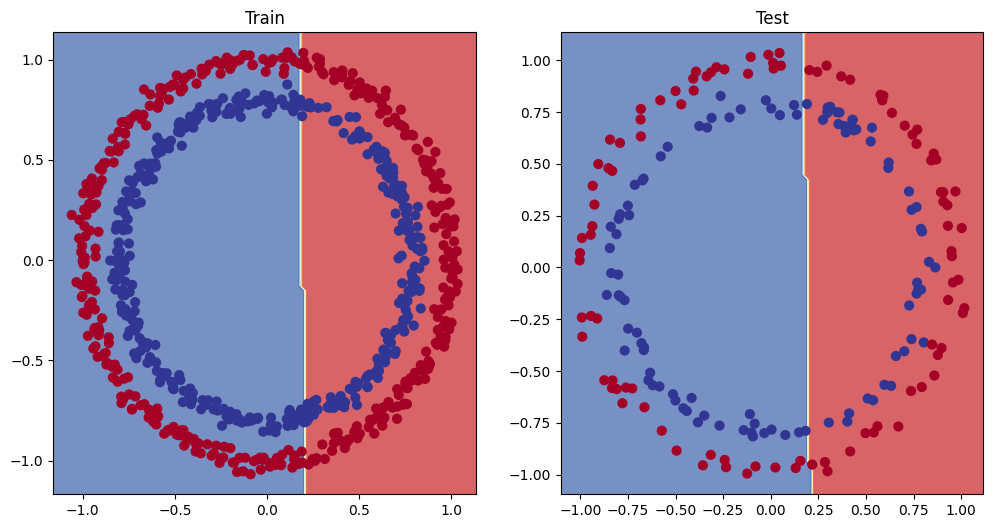

In [ ]:

# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)

In [ ]:
### Preparing data to see if our model can fit a straight line
# Lets make some linear data
weight = 0.7
bias = 0.3

X_regression = torch.arange(0, 1, .01).unsqueeze(dim = 1)
y_regression = weight* X_regression +bias

print(len(X_regression))
X_regression[:5], y_regression[:5]


100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:

# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

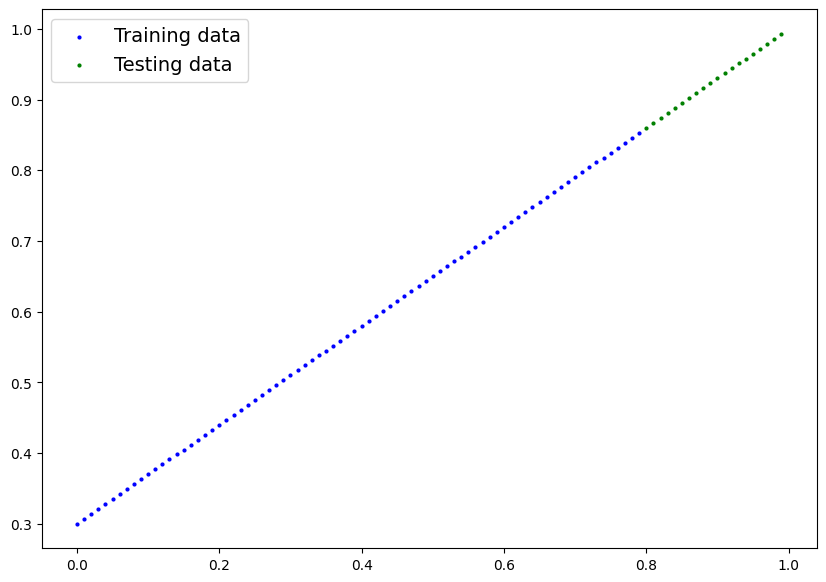

In [ ]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression);

In [ ]:
# same architecture

model_3 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_3

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.L1Loss() # MAE loss with regression data
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.01)

In [ ]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
  y_pred = model_3(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_3.eval()
  with torch.inference_mode():
    test_pred = model_3(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  # Print out what's happenin'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986 | Test loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test loss: 0.00360


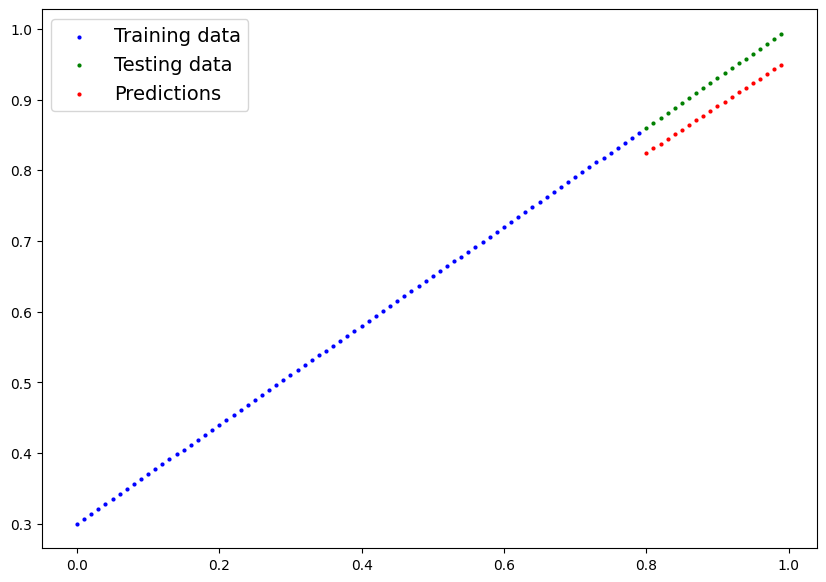

In [ ]:
# Turn on the evaluation mode

model_3.eval()

with torch.inference_mode():
  y_preds = model_3(X_test_regression)

plot_predictions(train_data = X_train_regression.cpu(),
                 train_labels = y_train_regression.cpu(),
                 test_data = X_test_regression.cpu(),
                 test_labels = y_test_regression.cpu(),
                 predictions = y_preds.cpu()
                 )

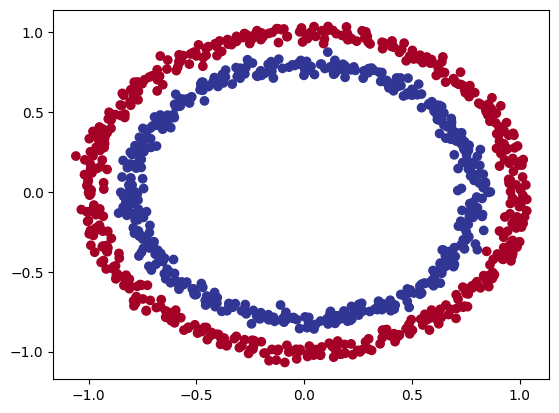

In [ ]:
## 6. The missing piece: non linearity
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [ ]:
# convert data to tensor
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test set
X_train , X_test, y_train, y_test = train_test_split(X,
                                                     y,
                                                     test_size = 0.2,
                                                     random_state = 42)

X_train[:5], y_train[:5]


(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [ ]:
### 6.2 Building a model with non Linearity
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 128)
    self.layer_2 = nn.Linear(in_features = 128, out_features = 256)
    self.layer_3 = nn.Linear(in_features = 256, out_features =1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_4 = CircleModelV2().to(device)
model_4

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=128, bias=True)
  (layer_2): Linear(in_features=128, out_features=256, bias=True)
  (layer_3): Linear(in_features=256, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# set up loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_4.parameters(),
                            lr =0.1)

In [ ]:
# 6.3 training a model with non linearity
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)

# loop through data

epochs = 1000

for epoch in range(epochs):
  model_4.train()

  # 1. forward pass
  y_logits = model_4(X_train).squeeze()
  y_pred =  torch.round(torch.sigmoid(y_logits))

  # 2. calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)
  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)

  # print out whats happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.6966, Acc: 37.62% | Test Loss: 0.6951, Test Acc: 43.00%
Epoch: 100 | Loss: 0.6594, Acc: 84.00% | Test Loss: 0.6651, Test Acc: 80.00%
Epoch: 200 | Loss: 0.5812, Acc: 99.00% | Test Loss: 0.5984, Test Acc: 96.00%
Epoch: 300 | Loss: 0.4078, Acc: 99.75% | Test Loss: 0.4452, Test Acc: 99.00%
Epoch: 400 | Loss: 0.4029, Acc: 72.88% | Test Loss: 0.5190, Test Acc: 62.00%
Epoch: 500 | Loss: 0.1161, Acc: 100.00% | Test Loss: 0.1561, Test Acc: 100.00%
Epoch: 600 | Loss: 0.0685, Acc: 100.00% | Test Loss: 0.1014, Test Acc: 100.00%
Epoch: 700 | Loss: 0.0461, Acc: 100.00% | Test Loss: 0.0739, Test Acc: 100.00%
Epoch: 800 | Loss: 0.0338, Acc: 100.00% | Test Loss: 0.0580, Test Acc: 100.00%
Epoch: 900 | Loss: 0.0263, Acc: 100.00% | Test Loss: 0.0479, Test Acc: 100.00%


In [ ]:
model_4.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_4(X_test))).squeeze()

y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

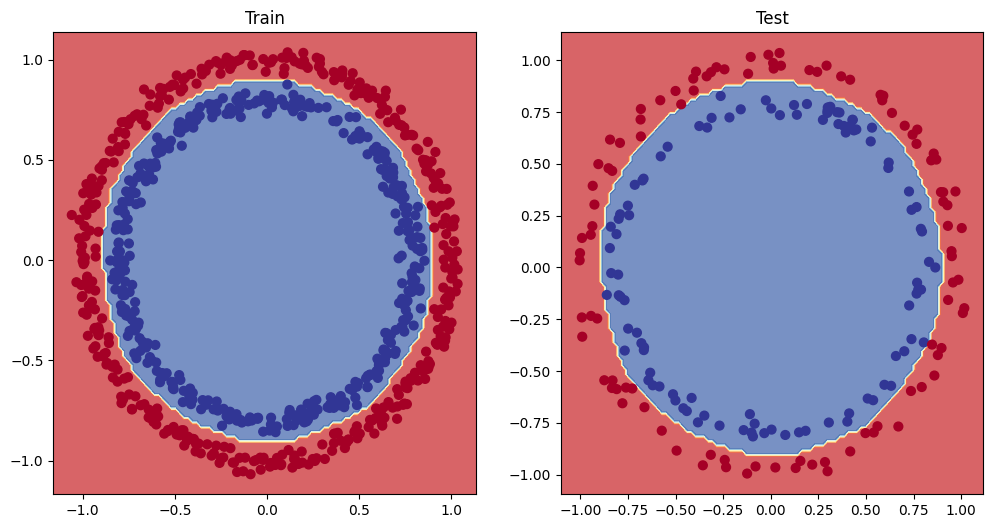

In [ ]:
# plot the decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_test, y_test)

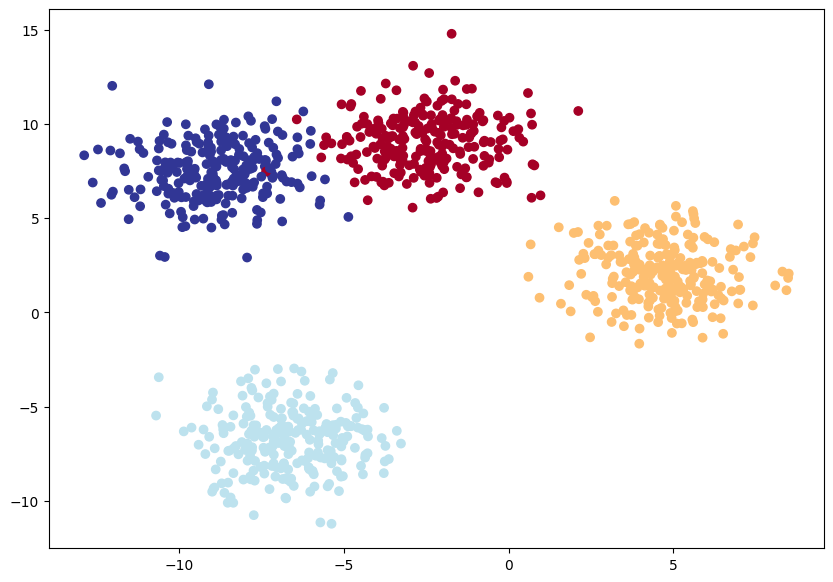

In [ ]:
## Putting it altogether with a multi class classification problem

import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameter for data creation
NUM_CLASSES = 4
NUM_FEATURES =2
RANDOM_SEED = 42

# Create multi -class data
X_blob , y_blob = make_blobs(n_samples=1000,
                             n_features =NUM_FEATURES,
                             centers = NUM_CLASSES,
                             cluster_std = 1.5,
                             random_state = RANDOM_SEED)

# Turn Data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size = 0.2,
                                                                        random_state = RANDOM_SEED)
# 4. plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c= y_blob, cmap = plt.cm.RdYlBu);


### Building a multi class classification problem

In [ ]:
# create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Build multi class classification problem
from torch import nn
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 8):
    """Initializes multi-class classification model.

    Args:
      input_features (int): Number of input features to the model
      output_features (int): Number of outputs features (number of output classes)
      hidden_units (int): Number of hidden units between layers, default 8

    Returns:

    Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_features)
    )

  def forward(self, x):
      return self.linear_layer_stack(x)


# Create an instance of our blob model and send it to the target device

model_5 = BlobModel(input_features= 2,
                    output_features=4,
                    hidden_units =8).to(device)
model_5

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
X_blob_train.shape, y_blob_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [ ]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

In [ ]:
# Create a loss function and multi class optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params = model_5.parameters(),
                            lr = 0.1)

In [ ]:
model_5.eval()
with torch.inference_mode():
  y_preds = model_5(X_blob_test.to(device))

y_preds[:10]


tensor([[ 0.3914,  0.1573, -0.3031,  0.5505],
        [-0.0173, -0.0325, -0.1432,  0.1044],
        [-0.0149, -0.4611,  1.6184, -1.9524],
        [ 0.3048, -0.0161, -0.2997,  0.1495],
        [ 0.0099,  0.0331, -0.2506,  0.7024],
        [ 0.0172,  0.0183, -0.1411,  0.1533],
        [ 0.1469, -0.4343,  1.5257, -1.7734],
        [-0.0664, -0.0650, -0.2107,  0.4431],
        [-0.2282, -0.5020,  1.8910, -2.3175],
        [-0.0566, -0.0501, -0.2195,  0.4995]], device='cuda:0')

In [ ]:
# Converts our models logits outputs to prediction probabilities
y_pred_probs = torch.softmax(y_preds, dim =1)
print(y_preds[:5])
print(y_pred_probs[:5])

tensor([[ 0.3914,  0.1573, -0.3031,  0.5505],
        [-0.0173, -0.0325, -0.1432,  0.1044],
        [-0.0149, -0.4611,  1.6184, -1.9524],
        [ 0.3048, -0.0161, -0.2997,  0.1495],
        [ 0.0099,  0.0331, -0.2506,  0.7024]], device='cuda:0')
tensor([[0.2888, 0.2285, 0.1442, 0.3386],
        [0.2502, 0.2465, 0.2207, 0.2826],
        [0.1448, 0.0927, 0.7416, 0.0209],
        [0.3197, 0.2319, 0.1747, 0.2737],
        [0.2087, 0.2135, 0.1608, 0.4170]], device='cuda:0')


In [ ]:
# convert our model's prediction probabilities to pedictions labels
y_preds = torch.argmax(y_pred_probs, dim = 1)
y_preds[:10]

tensor([3, 3, 2, 0, 3, 3, 2, 3, 2, 3], device='cuda:0')

In [ ]:
## Training loop and Testing loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

# put data to the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
  ### Train
  model_5.train()
  # 1. Forward pass
  y_logits = model_5(X_blob_train)
  y_pred = torch.softmax(y_logits, dim =1).argmax(dim = 1)

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true= y_blob_train,
                    y_pred = y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ## Testing
  model_5.eval()
  with torch.inference_mode():
    test_logits = model_5(X_blob_test)
    test_pred = torch.softmax(test_logits, dim =1).argmax(dim = 1)
    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true= y_blob_test,
                    y_pred = test_pred)
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 1.1566, Acc: 42.75% | Test Loss: 1.0356, Test Acc: 31.50%
Epoch: 10 | Loss: 0.6262, Acc: 73.00% | Test Loss: 0.5817, Test Acc: 79.50%
Epoch: 20 | Loss: 0.3879, Acc: 92.38% | Test Loss: 0.3858, Test Acc: 95.50%
Epoch: 30 | Loss: 0.2718, Acc: 98.62% | Test Loss: 0.2679, Test Acc: 99.00%
Epoch: 40 | Loss: 0.1642, Acc: 98.12% | Test Loss: 0.1544, Test Acc: 98.50%
Epoch: 50 | Loss: 0.1030, Acc: 98.00% | Test Loss: 0.0878, Test Acc: 98.50%
Epoch: 60 | Loss: 0.0673, Acc: 99.12% | Test Loss: 0.0624, Test Acc: 99.00%
Epoch: 70 | Loss: 0.0542, Acc: 99.00% | Test Loss: 0.0489, Test Acc: 99.50%
Epoch: 80 | Loss: 0.0467, Acc: 99.12% | Test Loss: 0.0408, Test Acc: 99.50%
Epoch: 90 | Loss: 0.0418, Acc: 99.12% | Test Loss: 0.0355, Test Acc: 99.50%


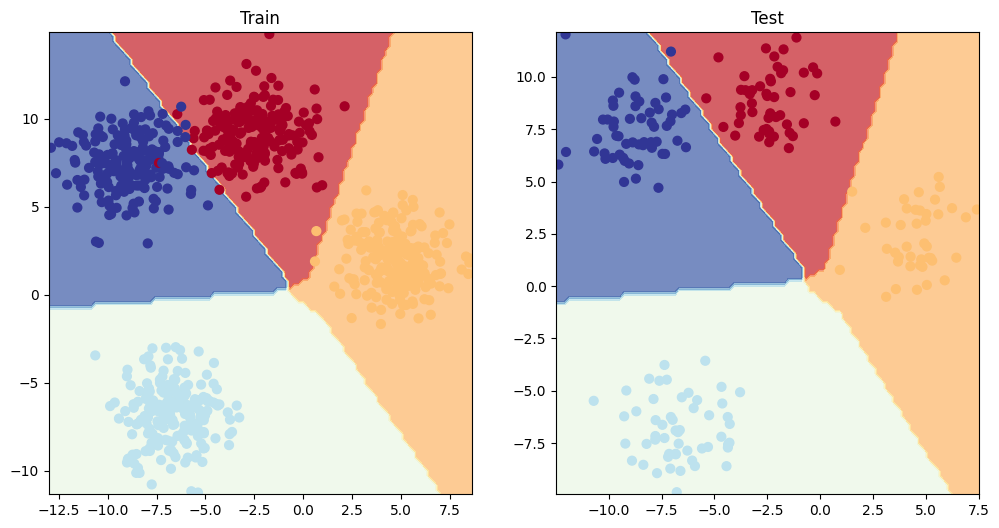

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_5, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_5, X_blob_test, y_blob_test)

from numpy.matrixlib.defmatrix import matrix
from pandas.core.arrays.timedeltas import precision_from_unit
### A few more classification metrics (to classification model)
* accuracy ( pretty good for balanced classes)
* precision
* Recall
* F1- Score
* Confusion matrix
* Classification Report